# Modeling: Heart Disease Prediction

### Objective
The goal is to build a classification model to predict the presence of heart disease (`target`) using patient clinical features

The difference __machine learning models__ used are:
1. Logistic Regression
2. Naive Bayes
3. Random Forest Classifier
4. Extreme Gradient Boost
5. K-Nearest Neighbour
6. Decision Tree
7. Support Vector Machine

In [1]:
# Import required libraries

import warnings
warnings.filterwarnings("ignore")

from sklearn.inspection import permutation_importance

import joblib

# loading dataset
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, classification_report

In [29]:
df = pd.read_csv("../Data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Check Class Balance
Check whether the data is equally split. Highly imbalanced data can lead to data problems

In [30]:
df["target"].value_counts(normalize=True)

target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

### Model Preparation
Prepare the data to be trained properly

In [31]:
y = df["target"]
X = df.drop("target", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### ML Models
Use the different machine learning algorithms to find which predicts accurately

In [33]:
m1 = "Logistic Regression"
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("Confusion Matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:", lr_acc_score*100, "\n")
print(classification_report(y_test, lr_predict))


Confusion Matrix
[[70 32]
 [13 90]]


Accuracy of Logistic Regression: 78.04878048780488 

              precision    recall  f1-score   support

           0       0.84      0.69      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.78       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.78      0.78       205



In [34]:
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_predict = nb.predict(X_test_scaled)
nb_conf_matrix = confusion_matrix(y_test, nb_predict)
nb_acc_score = accuracy_score(y_test, nb_predict)
print("Confusion Matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes Model:", nb_acc_score*100, "\n")
print(classification_report(y_test, nb_predict))


Confusion Matrix
[[73 29]
 [10 93]]


Accuracy of Naive Bayes Model: 80.97560975609757 

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       102
           1       0.76      0.90      0.83       103

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205



In [36]:
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=20, random_state=42, max_depth=5)
rf.fit(X_train_scaled, y_train)
rf_predict = rf.predict(X_test_scaled)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("Confusion Matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predict))

Confusion Matrix
[[78 24]
 [ 5 98]]


Accuracy of Random Forest: 85.85365853658537 

              precision    recall  f1-score   support

           0       0.94      0.76      0.84       102
           1       0.80      0.95      0.87       103

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
m4 = "Extreme Gradient Boost"
xgb = XGBClassifier(n_estimators=100, max_depth=15, learning_rate=0.1, random_state=42)
xgb.fit(X_train_scaled, y_train)
xgb_predict = xgb.predict(X_test_scaled)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predict)
xgb_acc_score = accuracy_score(y_test, xgb_predict)
print("Confusion Matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:", xgb_acc_score*100, "\n")
print(classification_report(y_test, xgb_predict))

Confusion Matrix
[[67 35]
 [ 7 96]]


Accuracy of Extreme Gradient Boost: 79.51219512195122 

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       102
           1       0.73      0.93      0.82       103

    accuracy                           0.80       205
   macro avg       0.82      0.79      0.79       205
weighted avg       0.82      0.80      0.79       205



In [44]:
m5 = "K-Neighbors Classifier"
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn_predict = knn.predict(X_test_scaled)
knn_conf_matrix = confusion_matrix(y_test, knn_predict)
knn_acc_score = accuracy_score(y_test, knn_predict)
print("Confusion Matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-Neighbors Classifier:", knn_acc_score*100, "\n")
print(classification_report(y_test, knn_predict))

Confusion Matrix
[[86 16]
 [16 87]]


Accuracy of K-Neighbors Classifier: 84.39024390243902 

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       102
           1       0.84      0.84      0.84       103

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [65]:
m6 = "Decision Tree Classifier"
dt = DecisionTreeClassifier(criterion="entropy", max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_predict = dt.predict(X_test_scaled)
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print("Confusion Matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of Decision Tree Classifier:", dt_acc_score*100, "\n")
print(classification_report(y_test, dt_predict))

Confusion Matrix
[[77 25]
 [ 5 98]]


Accuracy of Decision Tree Classifier: 85.36585365853658 

              precision    recall  f1-score   support

           0       0.94      0.75      0.84       102
           1       0.80      0.95      0.87       103

    accuracy                           0.85       205
   macro avg       0.87      0.85      0.85       205
weighted avg       0.87      0.85      0.85       205



In [71]:
m7 = "Support Vector Classifier"
svc = SVC(kernel="rbf", C=2, probability=True)
svc.fit(X_train_scaled, y_train)
svc_predict = svc.predict(X_test_scaled)
svc_conf_matrix = confusion_matrix(y_test, svc_predict)
svc_acc_score = accuracy_score(y_test, svc_predict)
print("Confusion Matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier", svc_acc_score*100, "\n")
print(classification_report(y_test, svc_predict))

Confusion Matrix
[[91 11]
 [ 4 99]]


Accuracy of Support Vector Classifier 92.6829268292683 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       102
           1       0.90      0.96      0.93       103

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



Text(0.5, 1.0, 'SVC Permutation Importance')

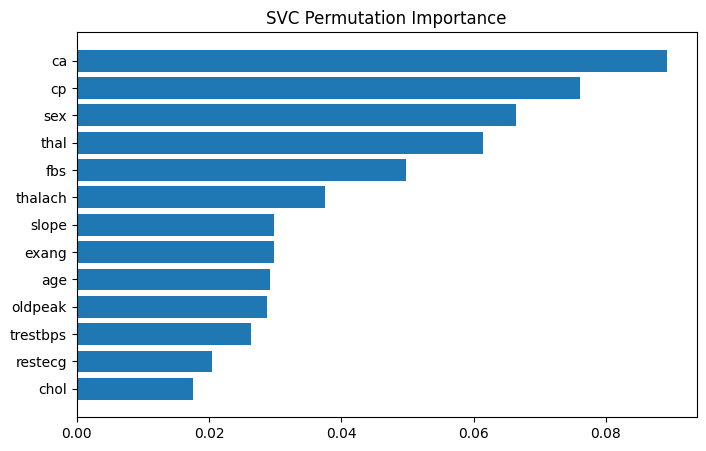

In [69]:
result = permutation_importance(svc, X_test_scaled, y_test, n_repeats=10, random_state=42)

importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance")

plt.figure(figsize=(8,5))
plt.barh(importance["Feature"], importance["Importance"])
plt.title("SVC Permutation Importance")


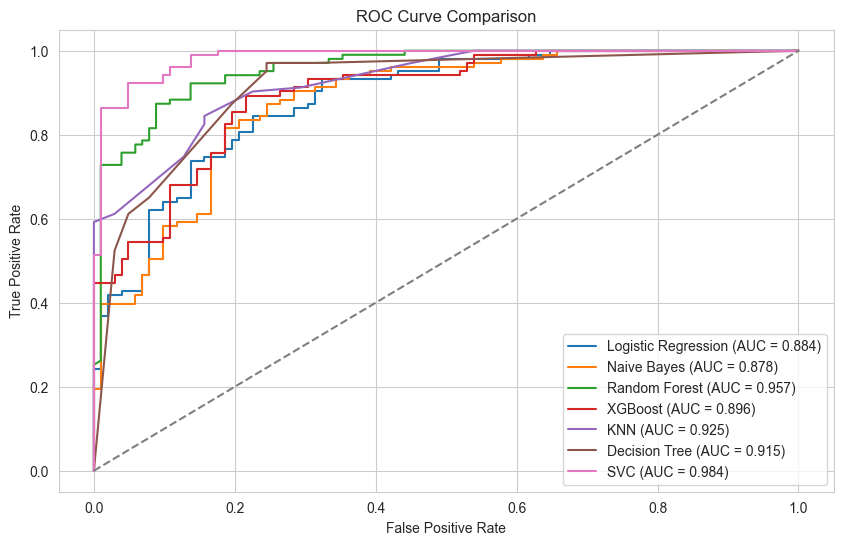

In [72]:
# Logistic Regression
lr_probs = lr.predict_proba(X_test_scaled)[:, 1]

# Naive Bayes
nb_probs = nb.predict_proba(X_test_scaled)[:, 1]

# Random Forest
rf_probs = rf.predict_proba(X_test_scaled)[:, 1]

# XGBoost
xgb_probs = xgb.predict_proba(X_test_scaled)[:, 1]

# KNN
knn_probs = knn.predict_proba(X_test_scaled)[:, 1]

# Decision Tree
dt_probs = dt.predict_proba(X_test_scaled)[:, 1]

# SVC
svc_probs = svc.predict_proba(X_test_scaled)[:, 1]

lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_probs)
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_probs)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_probs)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
svc_auc = roc_auc_score(y_test, svc_probs)

sns.set_style("whitegrid")
plt.figure(figsize=(10,6))

plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.3f})")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_auc:.3f})")
plt.plot(knn_fpr, knn_tpr, label=f"KNN (AUC = {knn_auc:.3f})")
plt.plot(dt_fpr, dt_tpr, label=f"Decision Tree (AUC = {dt_auc:.3f})")
plt.plot(svc_fpr, svc_tpr, label=f"SVC (AUC = {svc_auc:.3f})")

# Random baseline
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()

### Model Evaluation


In [76]:
model_names = [m1, m2, m3, m4, m5, m6, m7]
model_predicted = [lr_predict, nb_predict, rf_predict, xgb_predict, knn_predict, dt_predict, svc_predict]
model_probs = [lr_probs, nb_probs, rf_probs, xgb_probs, knn_probs, dt_probs, svc_probs]

# Store metrics
summary = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": [],
    "AUC": []
}

for i in range(len(model_names)):
    y_pred = model_predicted[i]
    y_prob = model_probs[i]
    
    summary["Model"].append(model_names[i])
    summary["Accuracy"].append(accuracy_score(y_test, y_pred))
    summary["Precision"].append(precision_score(y_test, y_pred))
    summary["Recall"].append(recall_score(y_test, y_pred))
    summary["F1 Score"].append(f1_score(y_test, y_pred))
    summary["AUC"].append(roc_auc_score(y_test, y_prob))


summary_df = pd.DataFrame(summary).round(3)

summary_df = summary_df.sort_values(by="AUC", ascending=False)

summary_df

,Model,Accuracy,Precision,Recall,F1 Score,AUC
6,Support Vector Classifier,0.927,0.900,0.961,0.930,0.984
2,Random Forest Classifier,0.859,0.803,0.951,0.871,0.957
4,K-Neighbors Classifier,0.844,0.845,0.845,0.845,0.925
5,Decision Tree Classifier,0.854,0.797,0.951,0.867,0.915
3,Extreme Gradient Boost,0.795,0.733,0.932,0.821,0.896
0,Logistic Regression,0.780,0.738,0.874,0.800,0.884
1,Naive Bayes,0.810,0.762,0.903,0.827,0.878


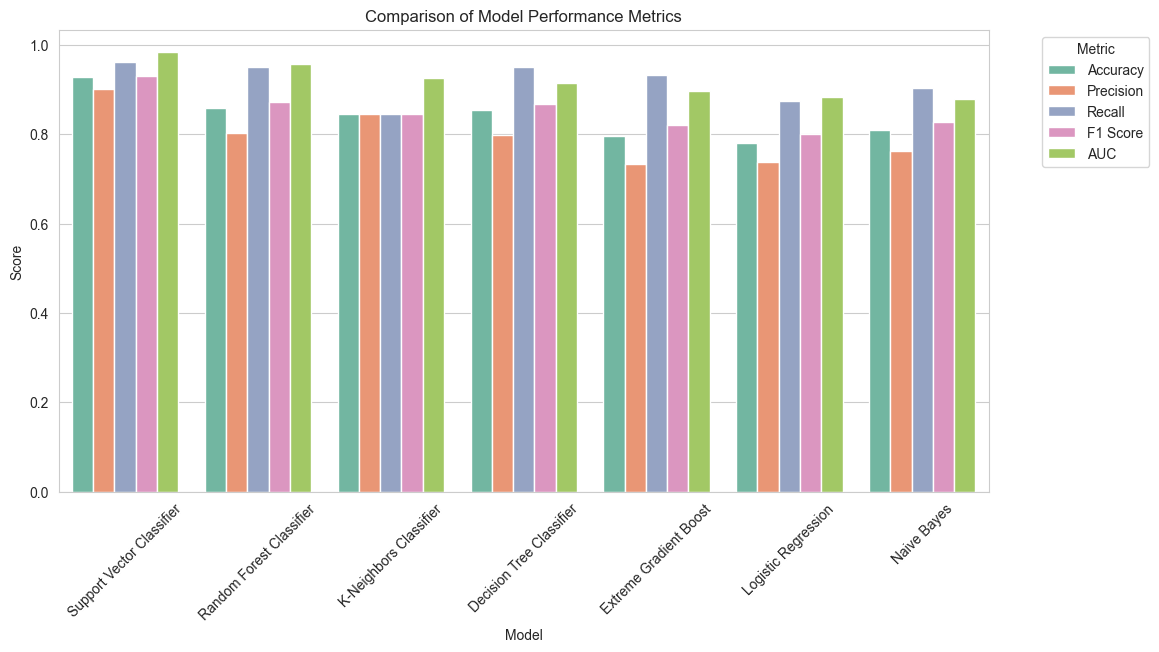

In [83]:
summary_long = summary_df.melt(id_vars="Model", 
                               value_vars=["Accuracy", "Precision", "Recall", "F1 Score", "AUC"],
                               var_name="Metric", value_name="Score")

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=summary_long, x="Model", y="Score", hue="Metric", palette="Set2")
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Conclusion
1. Support Vector Classifier gives the best Accuracy, Precision, Recall, F1_Score, and ROC_AUC compared to other models
2. The number of major blood vessels colored by fluoroscopy and chest pain type are major symptoms of heart attack

### Retrain Final Model 
Retrain the final model on the full dataset and save the artifacts

In [2]:
df = pd.read_csv("../Data/heart.csv")

X = df.drop("target", axis=1)
y = df["target"]

# Fit scaler on full dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train final SVC model (Best performing model)
final_model = SVC(kernel="rbf", C=2, probability=True, random_state=42)
final_model.fit(X_scaled, y)

# Save artifacts into App/ folder
joblib.dump(final_model, "../App/model.joblib")
joblib.dump(scaler, "../App/scaler.joblib")

['../App/scaler.joblib']